In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

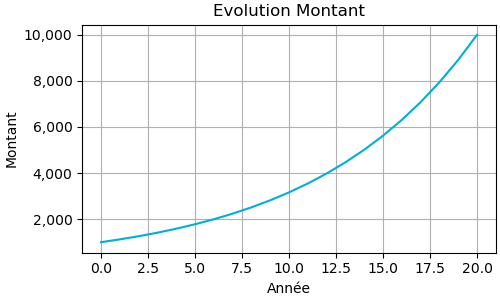

In [2]:
def calc(nb_years, r):
    account_history=pd.DataFrame(index=range(nb_years+1),columns= ['Amount_End_Of_Year'])
    Start_Amount = 1000
    
    for step in range(nb_years+1):       
        
        ## Update the account value for this time step
        account_value=Start_Amount*(1+r)**step
        ## Save the values so I can look at the history and plot it
        account_history.iloc[step]=account_value
    return account_history

nb_year=20
r = 0.122

plt.close('all')


out = widgets.Output()
 
# create some x data
years = np.linspace(0,nb_year, num= nb_year + 1)
 
# default line color
initial_color = '#00AFD7'
  
with out:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 3))
    line, = ax.plot(years, calc(nb_year,r)['Amount_End_Of_Year'], initial_color)
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)
plt.title('Evolution Montant')
plt.xlabel('Année')
plt.ylabel('Montant')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# create some control elements
int_slider_year = widgets.IntSlider(value=20, min=1, max=30, step=1, description='Nb Années')
int_slider_ir = widgets.IntSlider(value=12, min=0, max=50, step=1, description='Taux %')
caption1 = widgets.Label(value='Au bout de 20 ans, vous disposez de ')
caption2 = widgets.Label(value='9,646.29 EUR pour 1,000 EUR investis')
 
# callback functions
def update_duration(change):
    new_y=calc(change.new,int_slider_ir.value/100)
    caption1.value = 'Au bout de ' + str(change.new)+ ' ans, vous disposez de '
    caption2.value = "{:,.2f}".format(new_y['Amount_End_Of_Year'][change.new])  +' EUR pour 1,000 EUR investis'
    years = np.linspace(0,change.new, num= change.new + 1)
    ax.set_xlim(0, change.new *1.05)
    ax.set_ylim(1000, new_y['Amount_End_Of_Year'][change.new]*1.05)
    line.set_data(years,new_y['Amount_End_Of_Year'])
    

def update_ir(change):
    new_y=calc(int_slider_year.value,change.new/100)
    caption1.value = 'Au bout de ' + str(int_slider_year.value)+ ' ans, vous disposez de '
    caption2.value = "{:,.2f}".format(new_y['Amount_End_Of_Year'][int_slider_year.value])  +' EUR pour 1,000 EUR investis'
    years = np.linspace(0,int_slider_year.value, num= int_slider_year.value + 1)
    ax.set_xlim(0, int_slider_year.value *1.05)
    ax.set_ylim(1000, new_y['Amount_End_Of_Year'][int_slider_year.value]*1.05)
    line.set_data(years,new_y['Amount_End_Of_Year'])
     
     
# connect callbacks and traits
int_slider_year.observe(update_duration, 'value')
int_slider_ir.observe(update_ir, 'value')

control = widgets.VBox([
            int_slider_year, 
            int_slider_ir, 
            caption1,
            caption2
          ])


def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        align_items='center',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

control.layout = make_box_layout()


widgets.HBox([control, out])
